In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
sessionInfo()

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.2 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /tscc/nfs/home/ssharvey/miniconda3/envs/r4-base/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.2.0    Seurat_5.0.1       SeuratObject_5.0.1 sp_2.1-3          
[5] dplyr_1.1.4       

loaded via a namespace (and not attached):
  [1] deldir_2.0-4           pbapply_1.7-2        

In [3]:
#load data - D1
D1_cKO_LPS_1 <- Read10X(data.dir = "SoupX_outputs_052624/D1_cKO_LPS_1")
D1_cKO_LPS_2 <- Read10X(data.dir = "SoupX_outputs_052624/D1_cKO_LPS_2")
D1_cKO_saline_1 <- Read10X(data.dir = "SoupX_outputs_052624/D1_cKO_saline_1")
D1_cKO_saline_2 <- Read10X(data.dir = "SoupX_outputs_052624/D1_cKO_saline_2")
D1_control_LPS_1 <- Read10X(data.dir = "SoupX_outputs_052624/D1_control_LPS_1")
D1_control_LPS_2 <- Read10X(data.dir = "SoupX_outputs_052624/D1_control_LPS_2")
D1_control_saline_1 <- Read10X(data.dir = "SoupX_outputs_052624/D1_control_saline_1")
D1_control_saline_2 <- Read10X(data.dir = "SoupX_outputs_052624/D1_control_saline_2")

#load data - D6
D6_cKO_LPS_1 <- Read10X(data.dir = "SoupX_outputs_052624/D6_cKO_LPS_1")
D6_cKO_LPS_3 <- Read10X(data.dir = "SoupX_outputs_052624/D6_cKO_LPS_3")
D6_cKO_saline_1 <- Read10X(data.dir = "SoupX_outputs_052624/D6_cKO_saline_1")
D6_cKO_saline_2 <- Read10X(data.dir = "SoupX_outputs_052624/D6_cKO_saline_2")
D6_control_LPS_1 <- Read10X(data.dir = "SoupX_outputs_052624/D6_control_LPS_1")
D6_control_LPS_3 <- Read10X(data.dir = "SoupX_outputs_052624/D6_control_LPS_3")
D6_control_saline_1 <- Read10X(data.dir = "SoupX_outputs_052624/D6_control_saline_1")
D6_control_saline_2 <- Read10X(data.dir = "SoupX_outputs_052624/D6_control_saline_2")

In [4]:
#Create seurat objects
#D1 group
D1_cKO_LPS_1 <- CreateSeuratObject(counts = D1_cKO_LPS_1)
D1_cKO_LPS_2 <- CreateSeuratObject(counts = D1_cKO_LPS_2)
D1_cKO_saline_1 <- CreateSeuratObject(counts = D1_cKO_saline_1)
D1_cKO_saline_2 <- CreateSeuratObject(counts = D1_cKO_saline_2)
D1_control_LPS_1 <- CreateSeuratObject(counts = D1_control_LPS_1)
D1_control_LPS_2 <- CreateSeuratObject(counts = D1_control_LPS_2)
D1_control_saline_1 <- CreateSeuratObject(counts = D1_control_saline_1)
D1_control_saline_2 <- CreateSeuratObject(counts = D1_control_saline_2)

#D6 group
D6_cKO_LPS_1 <- CreateSeuratObject(counts = D6_cKO_LPS_1)
D6_cKO_LPS_3 <- CreateSeuratObject(counts = D6_cKO_LPS_3)
D6_cKO_saline_1 <- CreateSeuratObject(counts = D6_cKO_saline_1)
D6_cKO_saline_2 <- CreateSeuratObject(counts = D6_cKO_saline_2)
D6_control_LPS_1 <- CreateSeuratObject(counts = D6_control_LPS_1)
D6_control_LPS_3 <- CreateSeuratObject(counts = D6_control_LPS_3)
D6_control_saline_1 <- CreateSeuratObject(counts = D6_control_saline_1)
D6_control_saline_2 <- CreateSeuratObject(counts = D6_control_saline_2)

In [5]:
#calculate mitochondrial percentages
#D1 group
D1_cKO_LPS_1[["percent.mt"]] <- PercentageFeatureSet(D1_cKO_LPS_1, pattern = "^mt-")
D1_cKO_LPS_2[["percent.mt"]] <- PercentageFeatureSet(D1_cKO_LPS_2, pattern = "^mt-")
D1_cKO_saline_1[["percent.mt"]] <- PercentageFeatureSet(D1_cKO_saline_1, pattern = "^mt-")
D1_cKO_saline_2[["percent.mt"]] <- PercentageFeatureSet(D1_cKO_saline_2, pattern = "^mt-")
D1_control_LPS_1[["percent.mt"]] <- PercentageFeatureSet(D1_control_LPS_1, pattern = "^mt-")
D1_control_LPS_2[["percent.mt"]] <- PercentageFeatureSet(D1_control_LPS_2, pattern = "^mt-")
D1_control_saline_1[["percent.mt"]] <- PercentageFeatureSet(D1_control_saline_1, pattern = "^mt-")
D1_control_saline_2[["percent.mt"]] <- PercentageFeatureSet(D1_control_saline_2, pattern = "^mt-")

#D6 group
D6_cKO_LPS_1[["percent.mt"]] <- PercentageFeatureSet(D6_cKO_LPS_1, pattern = "^mt-")
D6_cKO_LPS_3[["percent.mt"]] <- PercentageFeatureSet(D6_cKO_LPS_3, pattern = "^mt-")
D6_cKO_saline_1[["percent.mt"]] <- PercentageFeatureSet(D6_cKO_saline_1, pattern = "^mt-")
D6_cKO_saline_2[["percent.mt"]] <- PercentageFeatureSet(D6_cKO_saline_2, pattern = "^mt-")
D6_control_LPS_1[["percent.mt"]] <- PercentageFeatureSet(D6_control_LPS_1, pattern = "^mt-")
D6_control_LPS_3[["percent.mt"]] <- PercentageFeatureSet(D6_control_LPS_3, pattern = "^mt-")
D6_control_saline_1[["percent.mt"]] <- PercentageFeatureSet(D6_control_saline_1, pattern = "^mt-")
D6_control_saline_2[["percent.mt"]] <- PercentageFeatureSet(D6_control_saline_2, pattern = "^mt-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


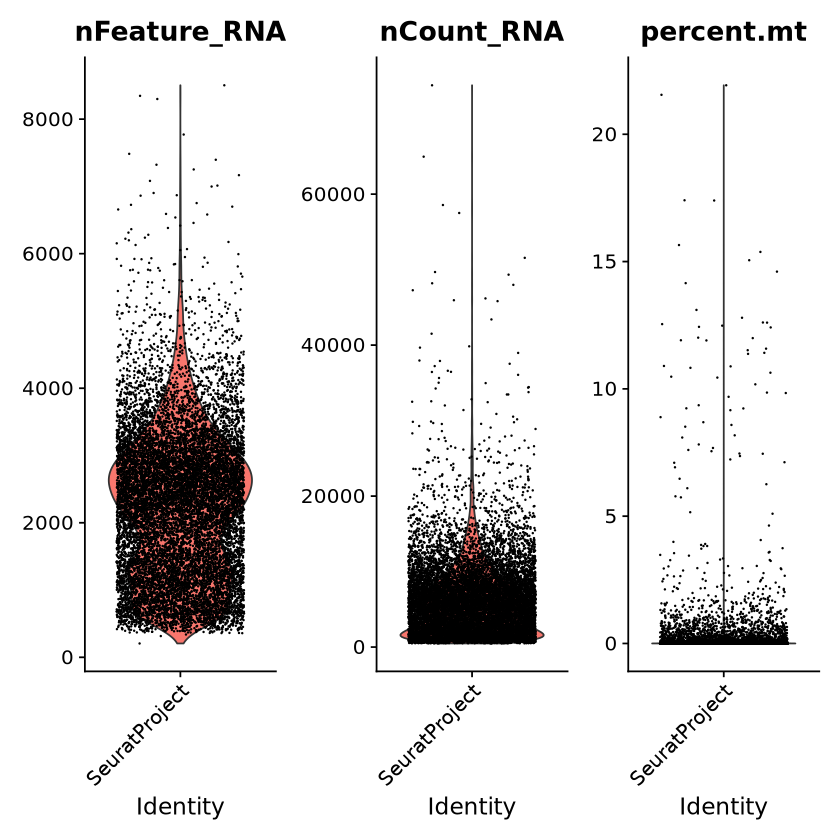

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


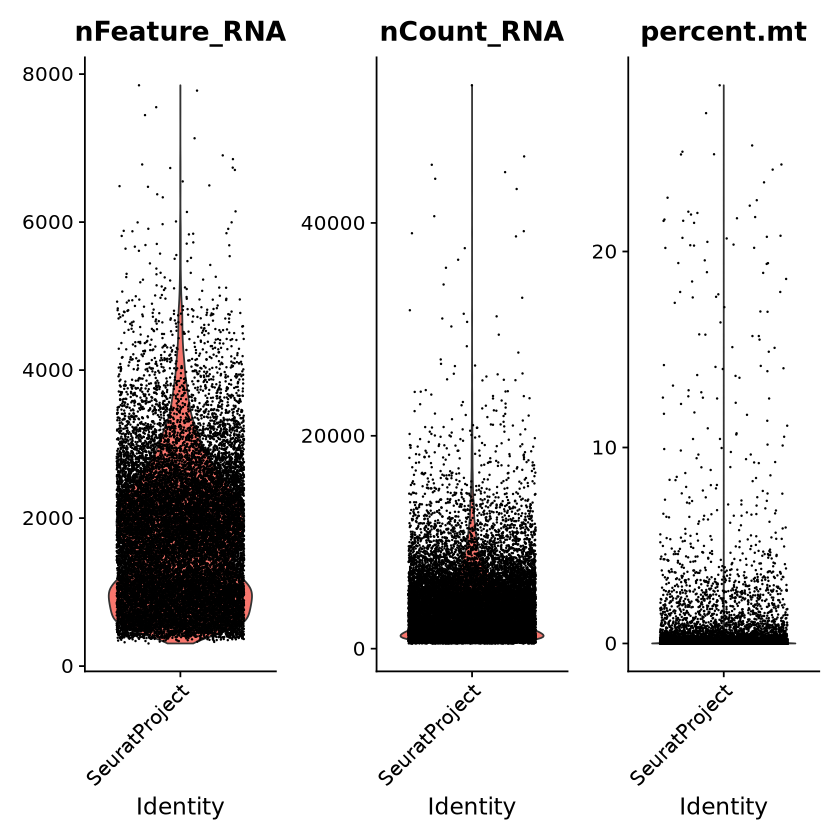

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


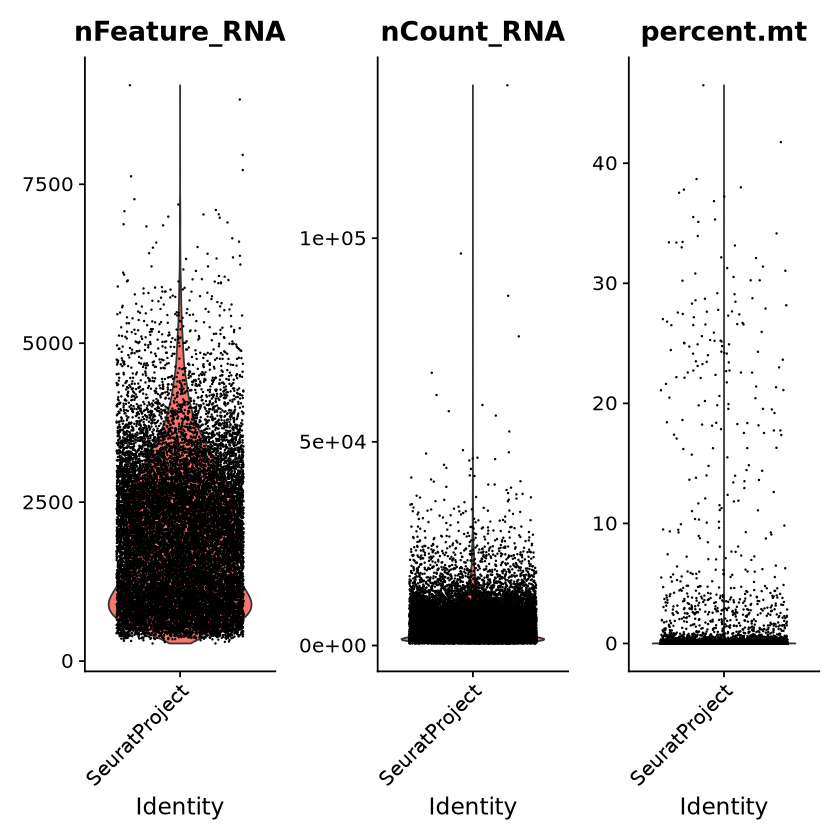

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


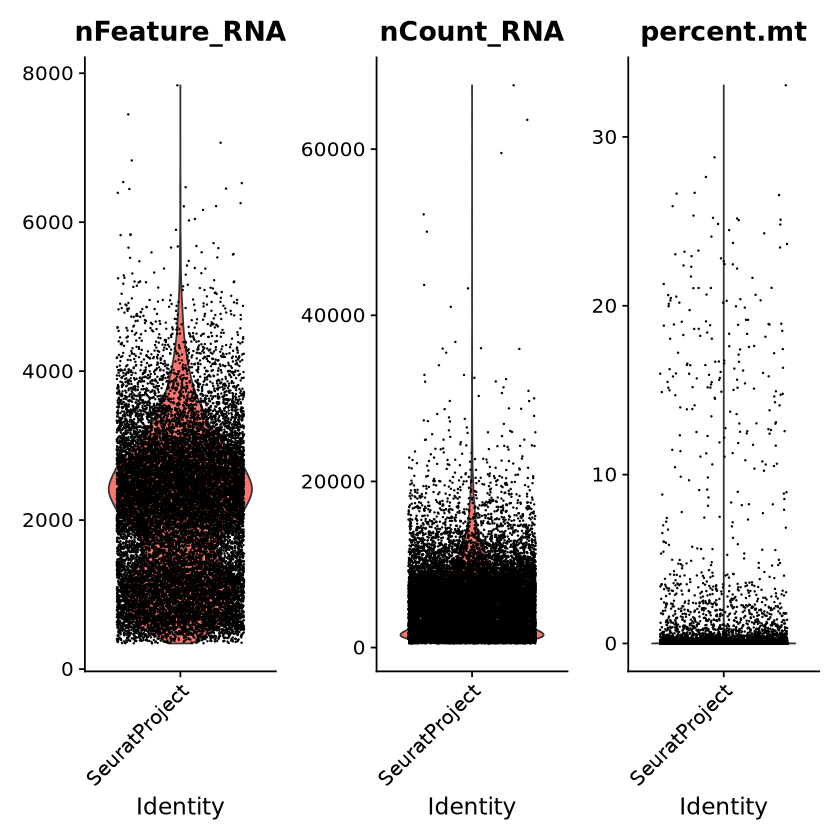

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


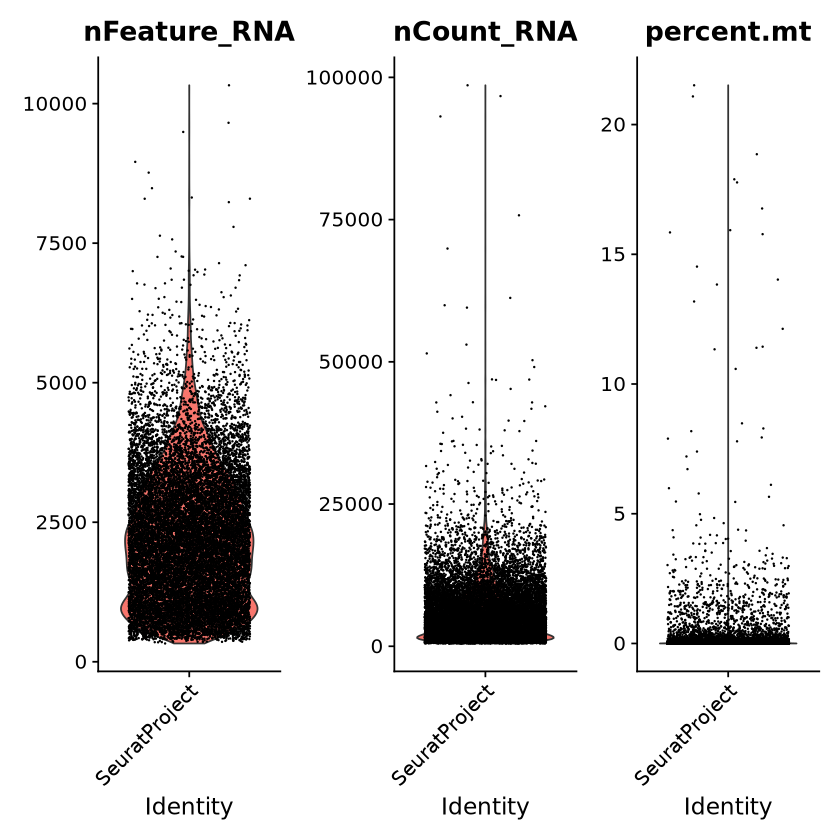

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


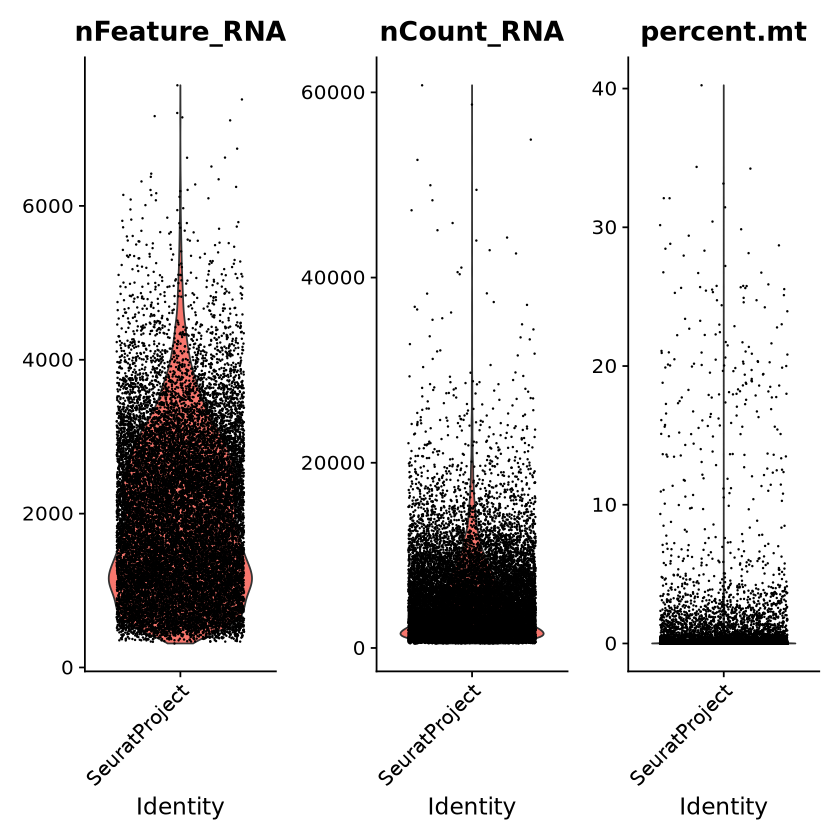

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


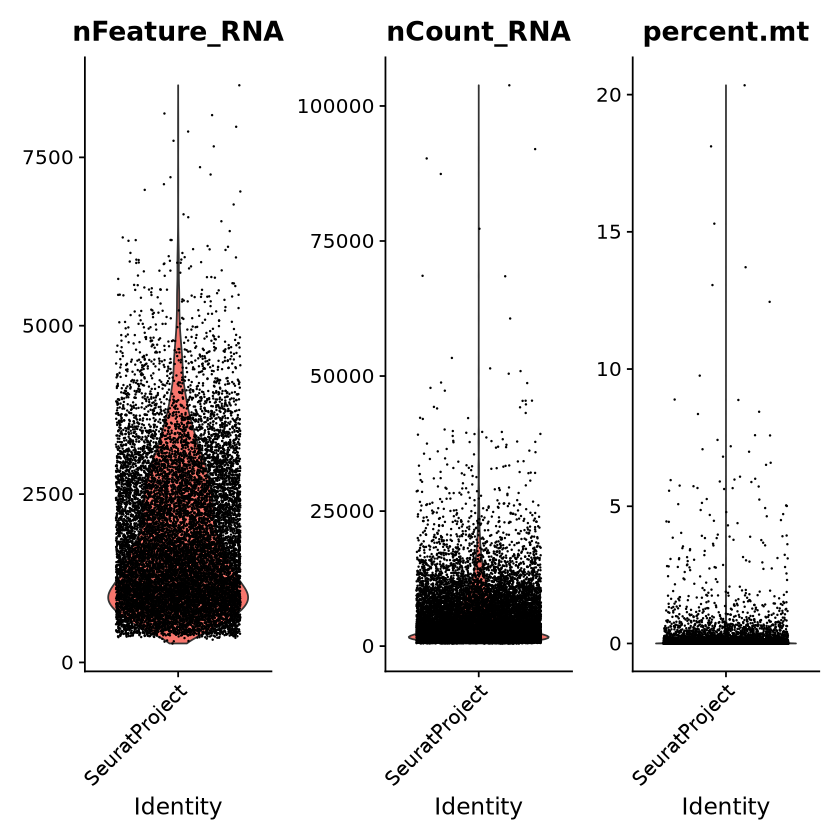

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


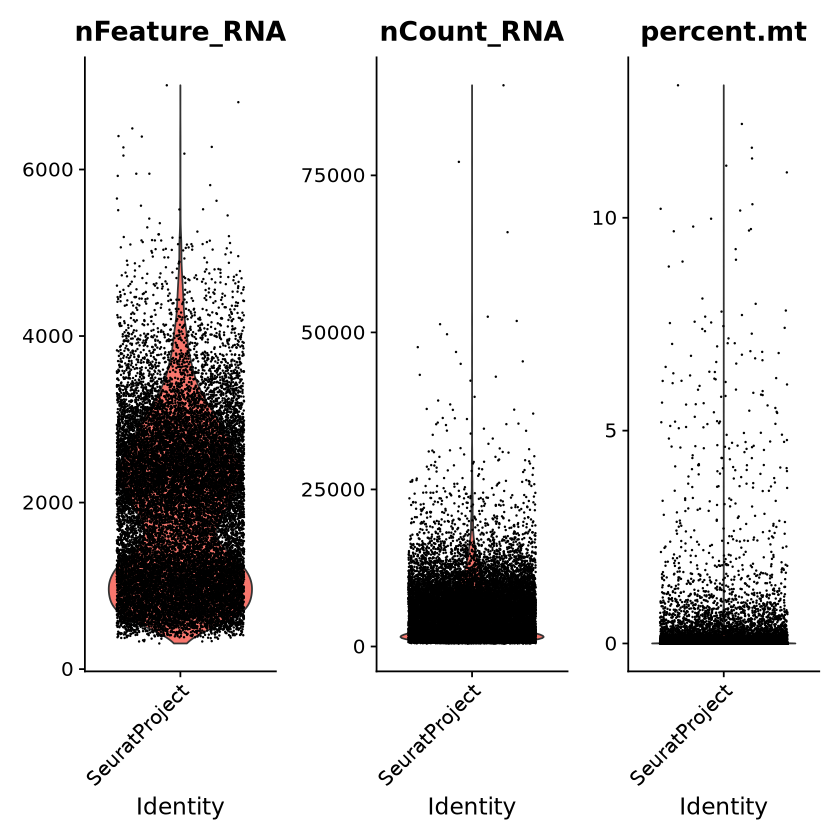

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


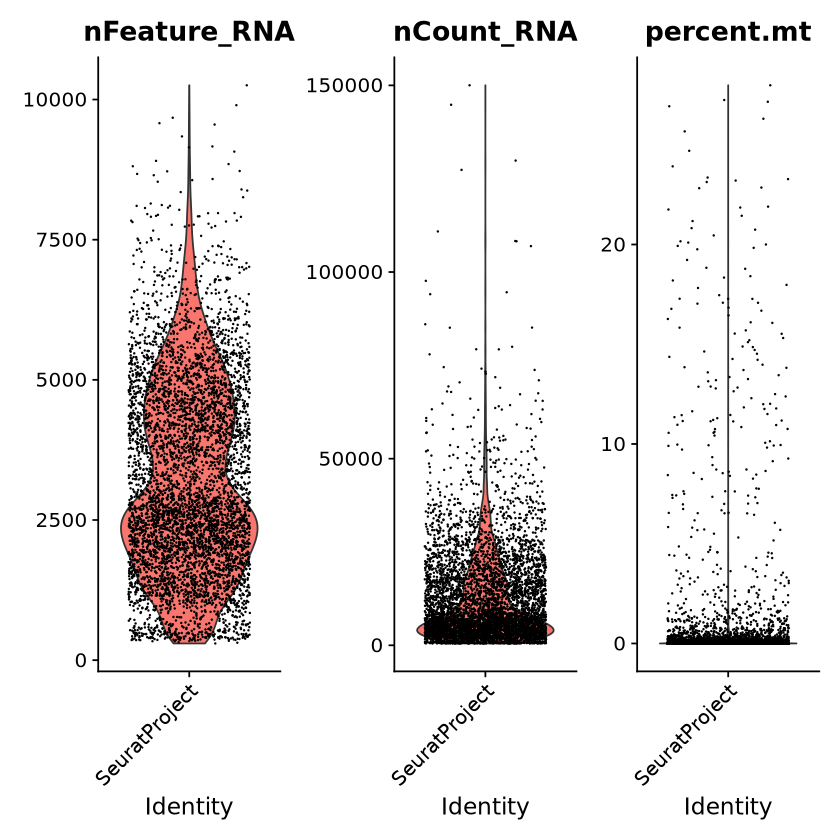

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


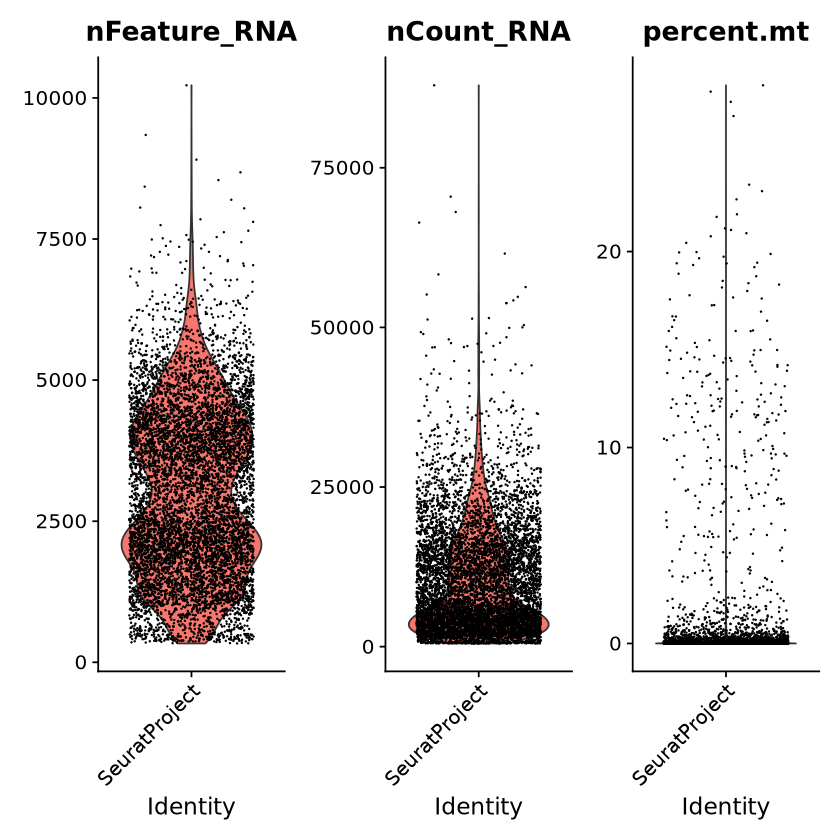

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


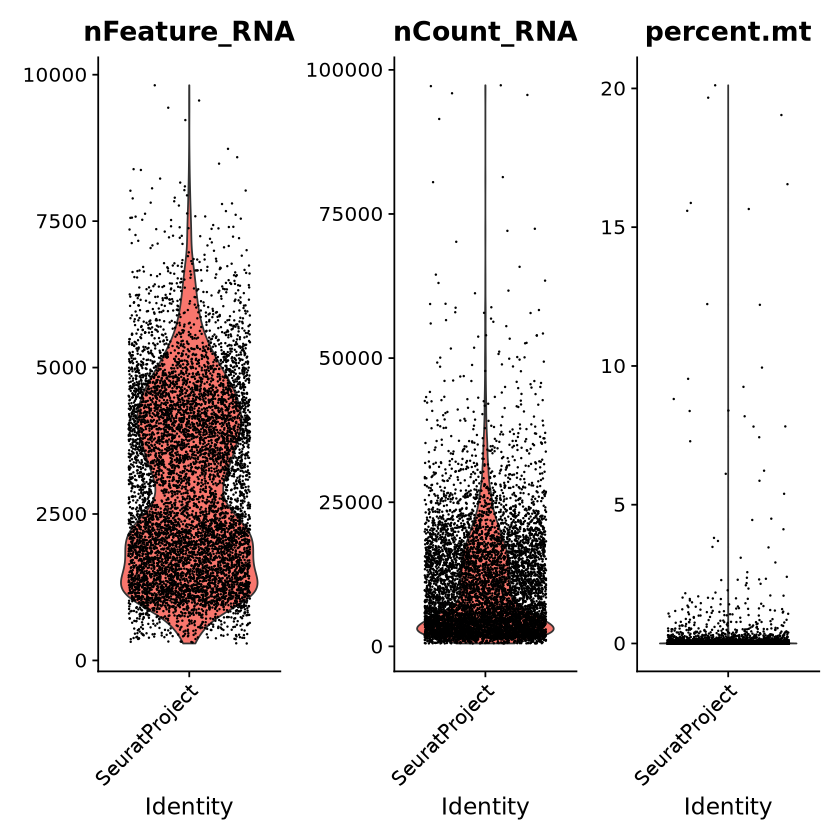

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


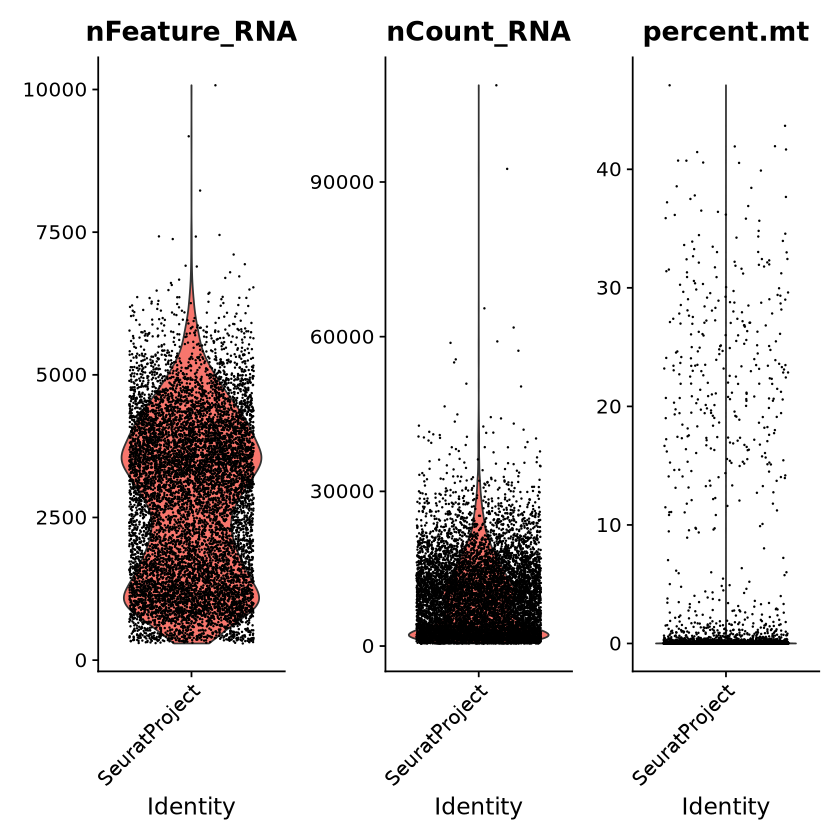

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


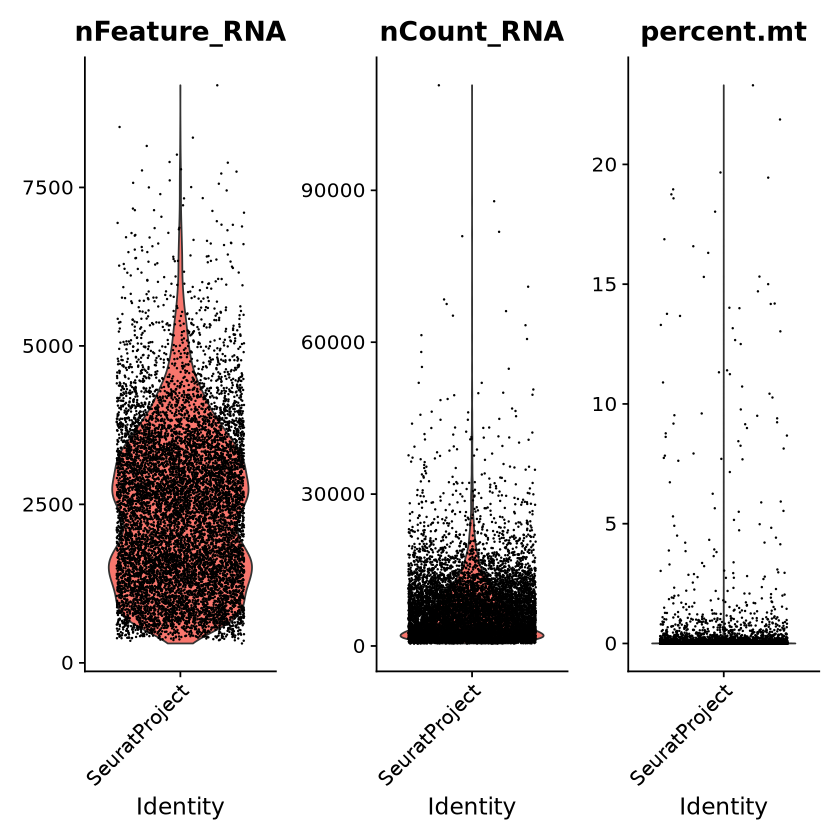

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


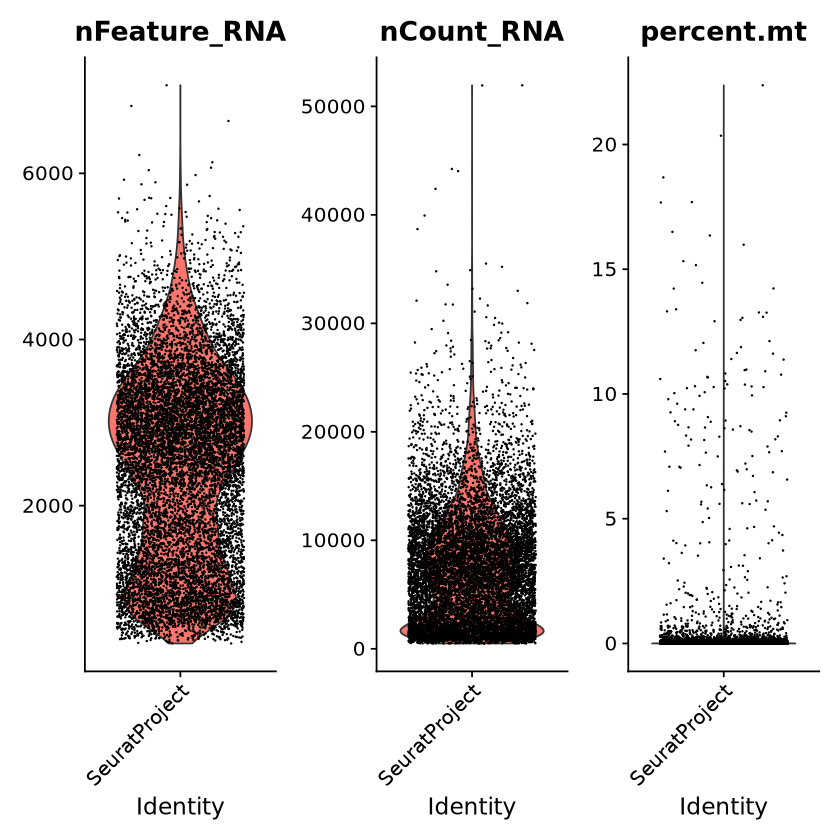

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


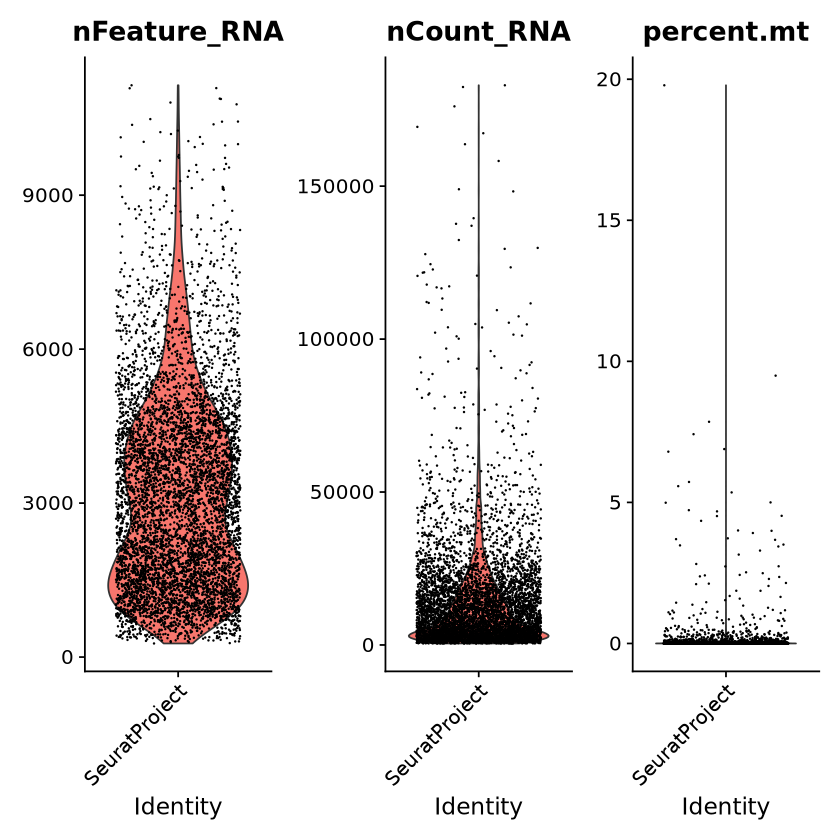

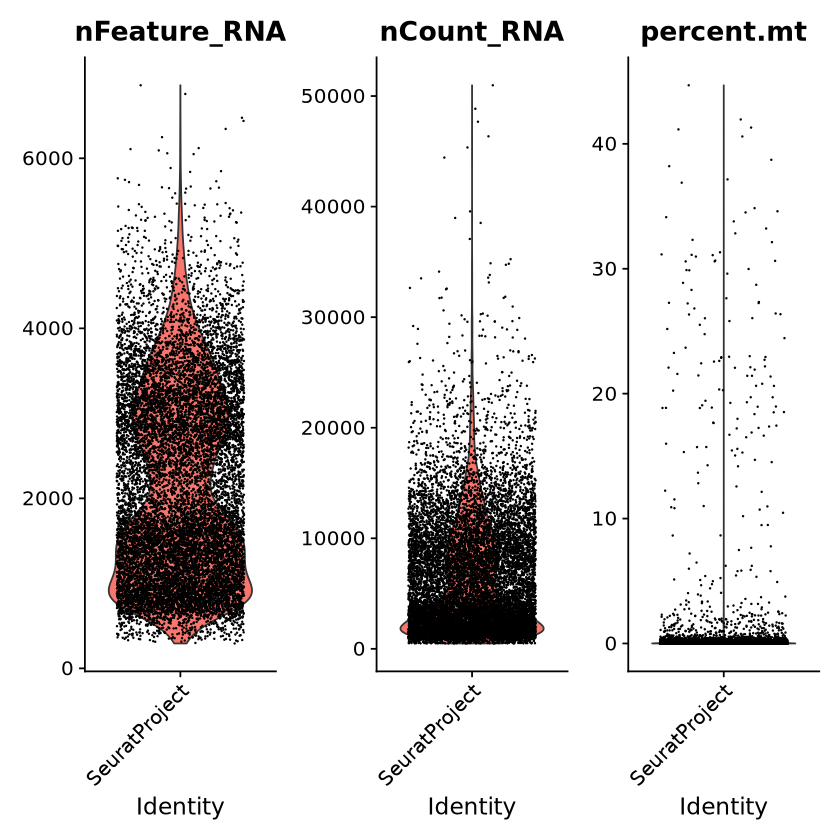

In [6]:
# Visualize QC metrics as a violin plot
#D1 group
VlnPlot(D1_cKO_LPS_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D1_cKO_LPS_2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D1_cKO_saline_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D1_cKO_saline_2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D1_control_LPS_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D1_control_LPS_2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D1_control_saline_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D1_control_saline_2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

#D6 group
VlnPlot(D6_cKO_LPS_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D6_cKO_LPS_3, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D6_cKO_saline_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D6_cKO_saline_2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D6_control_LPS_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D6_control_LPS_3, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D6_control_saline_1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
VlnPlot(D6_control_saline_2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)


In [8]:
#filter data to remove homotypic doublets and low quality nuclei based on high proportion of mitochondrial reads
#D1 group
D1_cKO_LPS_1 <- subset(D1_cKO_LPS_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_cKO_LPS_1
head(D1_cKO_LPS_1[[]])

D1_cKO_LPS_2 <- subset(D1_cKO_LPS_2, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_cKO_LPS_2
head(D1_cKO_LPS_2[[]])

D1_cKO_saline_1 <- subset(D1_cKO_saline_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_cKO_saline_1
head(D1_cKO_saline_1[[]])

D1_cKO_saline_2 <- subset(D1_cKO_saline_2, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_cKO_saline_2
head(D1_cKO_saline_2[[]])

D1_control_LPS_1 <- subset(D1_control_LPS_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_control_LPS_1
head(D1_control_LPS_1[[]])

D1_control_LPS_2 <- subset(D1_control_LPS_2, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_control_LPS_2
head(D1_control_LPS_2[[]])

D1_control_saline_1 <- subset(D1_control_saline_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_control_saline_1
head(D1_control_saline_1[[]])

D1_control_saline_2 <- subset(D1_control_saline_2, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D1_control_saline_2
head(D1_control_saline_2[[]])

#D6 group
D6_cKO_LPS_1 <- subset(D6_cKO_LPS_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_cKO_LPS_1
head(D6_cKO_LPS_1[[]])

D6_cKO_LPS_3 <- subset(D6_cKO_LPS_3, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_cKO_LPS_3
head(D6_cKO_LPS_3[[]])

D6_cKO_saline_1 <- subset(D6_cKO_saline_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_cKO_saline_1
head(D6_cKO_saline_1[[]])

D6_cKO_saline_2 <- subset(D6_cKO_saline_2, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_cKO_saline_2
head(D6_cKO_saline_2[[]])

D6_control_LPS_1 <- subset(D6_control_LPS_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_control_LPS_1
head(D6_control_LPS_1[[]])

D6_control_LPS_3 <- subset(D6_control_LPS_3, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_control_LPS_3
head(D6_control_LPS_3[[]])

D6_control_saline_1 <- subset(D6_control_saline_1, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_control_saline_1
head(D6_control_saline_1[[]])

D6_control_saline_2 <- subset(D6_control_saline_2, subset = nFeature_RNA > 200 & nFeature_RNA < 5000 & percent.mt < 5)
D6_control_saline_2
head(D6_control_saline_2[[]])

An object of class Seurat 
32285 features across 12989 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGTCGCGAA-1 SeuratProject 1599       1139         0.75046904
AAACCCAGTACAGAAT-1 SeuratProject 5167       2394         0.69672924
AAACCCAGTGATAGTA-1 SeuratProject 7121       2714         0.00000000
AAACCCAGTGTGAATA-1 SeuratProject 8604       3132         0.00000000
AAACCCAGTTCAAGTC-1 SeuratProject 1388        863         0.07204611
AAACCCAGTTTATGCG-1 SeuratProject 2798       1495         1.25089350

An object of class Seurat 
32285 features across 19746 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGAATCCCT-1 SeuratProject  638        537         0.94043887
AAACCCAAGCAACCAG-1 SeuratProject 7426       2886         0.06733100
AAACCCAAGTGTAGTA-1 SeuratProject 4345       2238         3.22209436
AAACCCACAAATACAG-1 SeuratProject  660        490         0.00000000
AAACCCACAACTACGT-1 SeuratProject 8074       3392         0.01238543
AAACCCACAAGTTCCA-1 SeuratProject 6225       2390         0.00000000

An object of class Seurat 
32285 features across 17178 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt 
AAACCCAAGCTTTCCC-1 SeuratProject  6658      2439         0.000000000
AAACCCAAGGGCGAGA-1 SeuratProject  3660      1677         0.000000000
AAACCCAAGTACCGGA-1 SeuratProject  3245      1602         0.308166410
AAACCCAAGTTCGCAT-1 SeuratProject 10303      3599         0.009705911
AAACCCACACACTTAG-1 SeuratProject 20468      4250         0.000000000
AAACCCACACAGTACT-1 SeuratProject 15827      3575         0.000000000

An object of class Seurat 
32285 features across 17370 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGCGGTAAC-1 SeuratProject  5512      2421         0.00000000
AAACCCAAGTGCACTT-1 SeuratProject  7303      2679         0.00000000
AAACCCACAAGACGGT-1 SeuratProject  6153      2433         0.01625223
AAACCCACACCCTTGT-1 SeuratProject 13620      3618         0.00000000
AAACCCACACCGTGCA-1 SeuratProject  1029       736         3.10981535
AAACCCACACTGAGGA-1 SeuratProject  1222       762         0.00000000

An object of class Seurat 
32285 features across 16309 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGTACGAGC-1 SeuratProject 2638       1495         0.03790751
AAACCCAAGTCTCTGA-1 SeuratProject 8426       3067         0.00000000
AAACCCACAAGTCATC-1 SeuratProject 2172       1212         0.13812155
AAACCCACAGAGTCAG-1 SeuratProject 5316       2264         0.00000000
AAACCCACAGGCACAA-1 SeuratProject 2670       1459         0.03745318
AAACCCACATGTCAGT-1 SeuratProject 8734       3113         0.00000000

An object of class Seurat 
32285 features across 17990 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGACCAACG-1 SeuratProject 4628       2158         0.00000000
AAACCCAAGACGAAGA-1 SeuratProject 3584       1686         0.00000000
AAACCCAAGAGCCGAT-1 SeuratProject 4168       2003         0.04798464
AAACCCAAGCCATTGT-1 SeuratProject 2486       1273         0.04022526
AAACCCACACCTCTAC-1 SeuratProject 7705       2760         0.01297859
AAACCCACAGACTCTA-1 SeuratProject 2791       1700         0.03582945

An object of class Seurat 
32285 features across 13986 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGACCTCAT-1 SeuratProject  2877      1190         0.00000000
AAACCCAAGCCTGAGA-1 SeuratProject  3856      1628         0.02593361
AAACCCAAGGGCAATC-1 SeuratProject  1685       919         0.00000000
AAACCCACAATCAAGA-1 SeuratProject 11483      3042         0.00000000
AAACCCACACACCTTC-1 SeuratProject  6198      2136         0.00000000
AAACCCACACTGGATT-1 SeuratProject  1307       750         0.68859985

An object of class Seurat 
32285 features across 19753 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGAAATGGG-1 SeuratProject  5467      2200         0.000000  
AAACCCAAGACGAAGA-1 SeuratProject  8910      2460         0.000000  
AAACCCAAGACTCGAG-1 SeuratProject  5727      2101         0.000000  
AAACCCAAGCTGCGAA-1 SeuratProject   838       599         3.579952  
AAACCCAAGGGCAGGA-1 SeuratProject  6597      2490         0.000000  
AAACCCACAACTTCTT-1 SeuratProject 11652      3063         0.000000

An object of class Seurat 
32285 features across 4485 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCACAATCGCAT-1 SeuratProject 2374       1498         0.75821398
AAACCCACATTCCTCG-1 SeuratProject 6795       2649         0.02943341
AAACGAAAGCGAAACC-1 SeuratProject 6724       2420         0.11897680
AAACGAATCACGATCA-1 SeuratProject 4740       2101         0.04219409
AAACGAATCATTACCT-1 SeuratProject 8078       2882         0.24758604
AAACGAATCGGTCACG-1 SeuratProject 5280       2071         0.00000000

An object of class Seurat 
32285 features across 6890 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt 
AAACCCAAGACCATTC-1 SeuratProject 18221      4629         0.005488173
AAACCCAAGCCGCTTG-1 SeuratProject  6611      2788         1.240356981
AAACCCACAAGTAGTA-1 SeuratProject  8553      2488         0.000000000
AAACCCACACTTGAGT-1 SeuratProject 13701      4033         0.000000000
AAACCCAGTGCAATAA-1 SeuratProject 12572      3842         0.000000000
AAACCCAGTTCCTAGA-1 SeuratProject  3978      1881         0.000000000

An object of class Seurat 
32285 features across 6904 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGAGTCTGG-1 SeuratProject  3222      1625         0.00000000
AAACCCATCAACGCTA-1 SeuratProject  8395      3090         0.00000000
AAACGAACATAGAGGC-1 SeuratProject  5218      2095         0.01916443
AAACGAATCAGCAATC-1 SeuratProject  4312      2000         0.34786642
AAACGAATCATTGCTT-1 SeuratProject 12726      3774         0.00000000
AAACGCTAGAGAGCCT-1 SeuratProject  8422      3211         0.00000000

An object of class Seurat 
32285 features across 8563 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGGGCAATC-1 SeuratProject 17141      4363         0.00000000
AAACCCACAGCTCATA-1 SeuratProject  3067      1481         0.00000000
AAACCCAGTCAATGGG-1 SeuratProject 14472      4011         0.00000000
AAACCCAGTCGAACGA-1 SeuratProject  3905      1680         0.02560819
AAACCCATCCGAACGC-1 SeuratProject  1723       972         0.00000000
AAACCCATCCGATAAC-1 SeuratProject 15441      3883         0.00000000

An object of class Seurat 
32285 features across 9462 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGTACCGGA-1 SeuratProject   800       523         0.00000000
AAACCCACAACTCATG-1 SeuratProject  1845      1050         0.05420054
AAACCCACAAGCGAAC-1 SeuratProject 14594      3815         0.00000000
AAACCCACACGACAAG-1 SeuratProject 12864      3654         0.00000000
AAACCCACACGTAACT-1 SeuratProject 12743      3726         0.00000000
AAACCCACAGCCGGTT-1 SeuratProject  3919      1783         0.00000000

An object of class Seurat 
32285 features across 10627 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGAGCTGCA-1 SeuratProject  1641      1064         0.0000000 
AAACCCAAGCCGGATA-1 SeuratProject  9653      3042         0.0000000 
AAACCCAAGCTTTCTT-1 SeuratProject  3915      1992         0.1787995 
AAACCCACAAGTCGTT-1 SeuratProject 11768      3703         0.0000000 
AAACCCAGTAGGGAGG-1 SeuratProject 10587      3366         0.0000000 
AAACCCAGTCTCTCCA-1 SeuratProject  8200      2935         0.0000000

An object of class Seurat 
32285 features across 5267 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGCGATGCA-1 SeuratProject  9351      3233         0.00000000
AAACCCAAGGCCCGTT-1 SeuratProject 15677      4096         0.00000000
AAACCCAAGTCTCGTA-1 SeuratProject  7404      2447         0.00000000
AAACCCACATCGTGGC-1 SeuratProject  4048      1707         0.02470356
AAACCCAGTAACTGCT-1 SeuratProject  2593      1238         0.03856537
AAACCCAGTACACGTT-1 SeuratProject 17696      4431         0.00000000

An object of class Seurat 
32285 features across 12851 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

orig.ident    nCount_RNA nFeature_RNA percent.mt
AAACCCAAGCACCAGA-1 SeuratProject 5487       2065         0.03644979
AAACCCAAGGAGGCAG-1 SeuratProject 3847       1650         0.00000000
AAACCCAAGGCATCAG-1 SeuratProject 3285       1559         0.03044140
AAACCCAAGTATGATG-1 SeuratProject 4968       1963         0.04025765
AAACCCACAAATAGCA-1 SeuratProject 1583        877         0.00000000
AAACCCACATCCTCAC-1 SeuratProject 1772        997         0.00000000

In [9]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D1_cKO_LPS_1), replace = TRUE)
D1_cKO_LPS_1$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D1_cKO_LPS_1), replace = TRUE)
D1_cKO_LPS_1$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_cKO_LPS_1), replace = TRUE)
D1_cKO_LPS_1$timepoint <- timepoint_label

group_label <- sample(x = "D1_cKO_LPS", size = ncol(D1_cKO_LPS_1), replace = TRUE)
D1_cKO_LPS_1$group <- group_label

sample_label <- sample(x = "D1_cKO_LPS_1", size = ncol(D1_cKO_LPS_1), replace = TRUE)
D1_cKO_LPS_1$sample <- sample_label
head(D1_cKO_LPS_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGTCGCGAA-1 SeuratProject 1599       1139         0.75046904 LPS      
AAACCCAGTACAGAAT-1 SeuratProject 5167       2394         0.69672924 LPS      
AAACCCAGTGATAGTA-1 SeuratProject 7121       2714         0.00000000 LPS      
AAACCCAGTGTGAATA-1 SeuratProject 8604       3132         0.00000000 LPS      
AAACCCAGTTCAAGTC-1 SeuratProject 1388        863         0.07204611 LPS      
AAACCCAGTTTATGCG-1 SeuratProject 2798       1495         1.25089350 LPS      
                   genotype   timepoint group      sample      
AAACCCAAGTCGCGAA-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_1
AAACCCAGTACAGAAT-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_1
AAACCCAGTGATAGTA-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_1
AAACCCAGTGTGAATA-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_1
AAACCCAGTTCAAGTC-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_1
AAACCCAGTTTATGCG-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_1

In [11]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D1_cKO_LPS_2), replace = TRUE)
D1_cKO_LPS_2$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D1_cKO_LPS_2), replace = TRUE)
D1_cKO_LPS_2$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_cKO_LPS_2), replace = TRUE)
D1_cKO_LPS_2$timepoint <- timepoint_label

group_label <- sample(x = "D1_cKO_LPS", size = ncol(D1_cKO_LPS_2), replace = TRUE)
D1_cKO_LPS_2$group <- group_label

sample_label <- sample(x = "D1_cKO_LPS_2", size = ncol(D1_cKO_LPS_2), replace = TRUE)
D1_cKO_LPS_2$sample <- sample_label
head(D1_cKO_LPS_2[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGAATCCCT-1 SeuratProject  638        537         0.94043887 LPS      
AAACCCAAGCAACCAG-1 SeuratProject 7426       2886         0.06733100 LPS      
AAACCCAAGTGTAGTA-1 SeuratProject 4345       2238         3.22209436 LPS      
AAACCCACAAATACAG-1 SeuratProject  660        490         0.00000000 LPS      
AAACCCACAACTACGT-1 SeuratProject 8074       3392         0.01238543 LPS      
AAACCCACAAGTTCCA-1 SeuratProject 6225       2390         0.00000000 LPS      
                   genotype   timepoint group      sample      
AAACCCAAGAATCCCT-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_2
AAACCCAAGCAACCAG-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_2
AAACCCAAGTGTAGTA-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_2
AAACCCACAAATACAG-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_2
AAACCCACAACTACGT-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_2
AAACCCACAAGTTCCA-1 Elovl7 cKO D1        D1_cKO_LPS D1_cKO_LPS_2

In [12]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D1_cKO_saline_1), replace = TRUE)
D1_cKO_saline_1$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D1_cKO_saline_1), replace = TRUE)
D1_cKO_saline_1$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_cKO_saline_1), replace = TRUE)
D1_cKO_saline_1$timepoint <- timepoint_label

group_label <- sample(x = "D1_cKO_saline", size = ncol(D1_cKO_saline_1), replace = TRUE)
D1_cKO_saline_1$group <- group_label

sample_label <- sample(x = "D1_cKO_saline_1", size = ncol(D1_cKO_saline_1), replace = TRUE)
D1_cKO_saline_1$sample <- sample_label
head(D1_cKO_saline_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt  treatment
AAACCCAAGCTTTCCC-1 SeuratProject  6658      2439         0.000000000 saline   
AAACCCAAGGGCGAGA-1 SeuratProject  3660      1677         0.000000000 saline   
AAACCCAAGTACCGGA-1 SeuratProject  3245      1602         0.308166410 saline   
AAACCCAAGTTCGCAT-1 SeuratProject 10303      3599         0.009705911 saline   
AAACCCACACACTTAG-1 SeuratProject 20468      4250         0.000000000 saline   
AAACCCACACAGTACT-1 SeuratProject 15827      3575         0.000000000 saline   
                   genotype   timepoint group         sample         
AAACCCAAGCTTTCCC-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_1
AAACCCAAGGGCGAGA-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_1
AAACCCAAGTACCGGA-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_1
AAACCCAAGTTCGCAT-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_1
AAACCCACACACTTAG-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_1
AAACCCACACAGTACT-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_1

In [13]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D1_cKO_saline_2), replace = TRUE)
D1_cKO_saline_2$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D1_cKO_saline_2), replace = TRUE)
D1_cKO_saline_2$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_cKO_saline_2), replace = TRUE)
D1_cKO_saline_2$timepoint <- timepoint_label

group_label <- sample(x = "D1_cKO_saline", size = ncol(D1_cKO_saline_2), replace = TRUE)
D1_cKO_saline_2$group <- group_label

sample_label <- sample(x = "D1_cKO_saline_2", size = ncol(D1_cKO_saline_2), replace = TRUE)
D1_cKO_saline_2$sample <- sample_label
head(D1_cKO_saline_2[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGCGGTAAC-1 SeuratProject  5512      2421         0.00000000 saline   
AAACCCAAGTGCACTT-1 SeuratProject  7303      2679         0.00000000 saline   
AAACCCACAAGACGGT-1 SeuratProject  6153      2433         0.01625223 saline   
AAACCCACACCCTTGT-1 SeuratProject 13620      3618         0.00000000 saline   
AAACCCACACCGTGCA-1 SeuratProject  1029       736         3.10981535 saline   
AAACCCACACTGAGGA-1 SeuratProject  1222       762         0.00000000 saline   
                   genotype   timepoint group         sample         
AAACCCAAGCGGTAAC-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_2
AAACCCAAGTGCACTT-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_2
AAACCCACAAGACGGT-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_2
AAACCCACACCCTTGT-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_2
AAACCCACACCGTGCA-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_2
AAACCCACACTGAGGA-1 Elovl7 cKO D1        D1_cKO_saline D1_cKO_saline_2

In [14]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D1_control_LPS_1), replace = TRUE)
D1_control_LPS_1$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D1_control_LPS_1), replace = TRUE)
D1_control_LPS_1$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_control_LPS_1), replace = TRUE)
D1_control_LPS_1$timepoint <- timepoint_label

group_label <- sample(x = "D1_control_LPS", size = ncol(D1_control_LPS_1), replace = TRUE)
D1_control_LPS_1$group <- group_label

sample_label <- sample(x = "D1_control_LPS_1", size = ncol(D1_control_LPS_1), replace = TRUE)
D1_control_LPS_1$sample <- sample_label
head(D1_control_LPS_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGTACGAGC-1 SeuratProject 2638       1495         0.03790751 LPS      
AAACCCAAGTCTCTGA-1 SeuratProject 8426       3067         0.00000000 LPS      
AAACCCACAAGTCATC-1 SeuratProject 2172       1212         0.13812155 LPS      
AAACCCACAGAGTCAG-1 SeuratProject 5316       2264         0.00000000 LPS      
AAACCCACAGGCACAA-1 SeuratProject 2670       1459         0.03745318 LPS      
AAACCCACATGTCAGT-1 SeuratProject 8734       3113         0.00000000 LPS      
                   genotype timepoint group          sample          
AAACCCAAGTACGAGC-1 control  D1        D1_control_LPS D1_control_LPS_1
AAACCCAAGTCTCTGA-1 control  D1        D1_control_LPS D1_control_LPS_1
AAACCCACAAGTCATC-1 control  D1        D1_control_LPS D1_control_LPS_1
AAACCCACAGAGTCAG-1 control  D1        D1_control_LPS D1_control_LPS_1
AAACCCACAGGCACAA-1 control  D1        D1_control_LPS D1_control_LPS_1
AAACCCACATGTCAGT-1 control  D1        D1_control_LPS D1_control_LPS_1

In [15]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D1_control_LPS_2), replace = TRUE)
D1_control_LPS_2$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D1_control_LPS_2), replace = TRUE)
D1_control_LPS_2$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_control_LPS_2), replace = TRUE)
D1_control_LPS_2$timepoint <- timepoint_label

group_label <- sample(x = "D1_control_LPS", size = ncol(D1_control_LPS_2), replace = TRUE)
D1_control_LPS_2$group <- group_label

sample_label <- sample(x = "D1_control_LPS_2", size = ncol(D1_control_LPS_2), replace = TRUE)
D1_control_LPS_2$sample <- sample_label
head(D1_control_LPS_2[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGACCAACG-1 SeuratProject 4628       2158         0.00000000 LPS      
AAACCCAAGACGAAGA-1 SeuratProject 3584       1686         0.00000000 LPS      
AAACCCAAGAGCCGAT-1 SeuratProject 4168       2003         0.04798464 LPS      
AAACCCAAGCCATTGT-1 SeuratProject 2486       1273         0.04022526 LPS      
AAACCCACACCTCTAC-1 SeuratProject 7705       2760         0.01297859 LPS      
AAACCCACAGACTCTA-1 SeuratProject 2791       1700         0.03582945 LPS      
                   genotype timepoint group          sample          
AAACCCAAGACCAACG-1 control  D1        D1_control_LPS D1_control_LPS_2
AAACCCAAGACGAAGA-1 control  D1        D1_control_LPS D1_control_LPS_2
AAACCCAAGAGCCGAT-1 control  D1        D1_control_LPS D1_control_LPS_2
AAACCCAAGCCATTGT-1 control  D1        D1_control_LPS D1_control_LPS_2
AAACCCACACCTCTAC-1 control  D1        D1_control_LPS D1_control_LPS_2
AAACCCACAGACTCTA-1 control  D1        D1_control_LPS D1_control_LPS_2

In [16]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D1_control_saline_1), replace = TRUE)
D1_control_saline_1$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D1_control_saline_1), replace = TRUE)
D1_control_saline_1$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_control_saline_1), replace = TRUE)
D1_control_saline_1$timepoint <- timepoint_label

group_label <- sample(x = "D1_control_saline", size = ncol(D1_control_saline_1), replace = TRUE)
D1_control_saline_1$group <- group_label

sample_label <- sample(x = "D1_control_saline_1", size = ncol(D1_control_saline_1), replace = TRUE)
D1_control_saline_1$sample <- sample_label
head(D1_control_saline_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGACCTCAT-1 SeuratProject  2877      1190         0.00000000 saline   
AAACCCAAGCCTGAGA-1 SeuratProject  3856      1628         0.02593361 saline   
AAACCCAAGGGCAATC-1 SeuratProject  1685       919         0.00000000 saline   
AAACCCACAATCAAGA-1 SeuratProject 11483      3042         0.00000000 saline   
AAACCCACACACCTTC-1 SeuratProject  6198      2136         0.00000000 saline   
AAACCCACACTGGATT-1 SeuratProject  1307       750         0.68859985 saline   
                   genotype timepoint group             sample             
AAACCCAAGACCTCAT-1 control  D1        D1_control_saline D1_control_saline_1
AAACCCAAGCCTGAGA-1 control  D1        D1_control_saline D1_control_saline_1
AAACCCAAGGGCAATC-1 control  D1        D1_control_saline D1_control_saline_1
AAACCCACAATCAAGA-1 control  D1        D1_control_saline D1_control_saline_1
AAACCCACACACCTTC-1 control  D1        D1_control_saline D1_control_saline_1
AAACCCACACTGGATT-1 control  D1        D1_control_saline D1_control_saline_1

In [17]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D1_control_saline_2), replace = TRUE)
D1_control_saline_2$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D1_control_saline_2), replace = TRUE)
D1_control_saline_2$genotype <- genotype_label

timepoint_label <- sample(x = "D1", size = ncol(D1_control_saline_2), replace = TRUE)
D1_control_saline_2$timepoint <- timepoint_label

group_label <- sample(x = "D1_control_saline", size = ncol(D1_control_saline_2), replace = TRUE)
D1_control_saline_2$group <- group_label

sample_label <- sample(x = "D1_control_saline_2", size = ncol(D1_control_saline_2), replace = TRUE)
D1_control_saline_2$sample <- sample_label
head(D1_control_saline_2[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGAAATGGG-1 SeuratProject  5467      2200         0.000000   saline   
AAACCCAAGACGAAGA-1 SeuratProject  8910      2460         0.000000   saline   
AAACCCAAGACTCGAG-1 SeuratProject  5727      2101         0.000000   saline   
AAACCCAAGCTGCGAA-1 SeuratProject   838       599         3.579952   saline   
AAACCCAAGGGCAGGA-1 SeuratProject  6597      2490         0.000000   saline   
AAACCCACAACTTCTT-1 SeuratProject 11652      3063         0.000000   saline   
                   genotype timepoint group             sample             
AAACCCAAGAAATGGG-1 control  D1        D1_control_saline D1_control_saline_2
AAACCCAAGACGAAGA-1 control  D1        D1_control_saline D1_control_saline_2
AAACCCAAGACTCGAG-1 control  D1        D1_control_saline D1_control_saline_2
AAACCCAAGCTGCGAA-1 control  D1        D1_control_saline D1_control_saline_2
AAACCCAAGGGCAGGA-1 control  D1        D1_control_saline D1_control_saline_2
AAACCCACAACTTCTT-1 control  D1        D1_control_saline D1_control_saline_2

In [18]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D6_cKO_LPS_1), replace = TRUE)
D6_cKO_LPS_1$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D6_cKO_LPS_1), replace = TRUE)
D6_cKO_LPS_1$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_cKO_LPS_1), replace = TRUE)
D6_cKO_LPS_1$timepoint <- timepoint_label

group_label <- sample(x = "D6_cKO_LPS", size = ncol(D6_cKO_LPS_1), replace = TRUE)
D6_cKO_LPS_1$group <- group_label

sample_label <- sample(x = "D6_cKO_LPS_1", size = ncol(D6_cKO_LPS_1), replace = TRUE)
D6_cKO_LPS_1$sample <- sample_label
head(D6_cKO_LPS_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCACAATCGCAT-1 SeuratProject 2374       1498         0.75821398 LPS      
AAACCCACATTCCTCG-1 SeuratProject 6795       2649         0.02943341 LPS      
AAACGAAAGCGAAACC-1 SeuratProject 6724       2420         0.11897680 LPS      
AAACGAATCACGATCA-1 SeuratProject 4740       2101         0.04219409 LPS      
AAACGAATCATTACCT-1 SeuratProject 8078       2882         0.24758604 LPS      
AAACGAATCGGTCACG-1 SeuratProject 5280       2071         0.00000000 LPS      
                   genotype   timepoint group      sample      
AAACCCACAATCGCAT-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_1
AAACCCACATTCCTCG-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_1
AAACGAAAGCGAAACC-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_1
AAACGAATCACGATCA-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_1
AAACGAATCATTACCT-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_1
AAACGAATCGGTCACG-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_1

In [19]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D6_cKO_LPS_3), replace = TRUE)
D6_cKO_LPS_3$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D6_cKO_LPS_3), replace = TRUE)
D6_cKO_LPS_3$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_cKO_LPS_3), replace = TRUE)
D6_cKO_LPS_3$timepoint <- timepoint_label

group_label <- sample(x = "D6_cKO_LPS", size = ncol(D6_cKO_LPS_3), replace = TRUE)
D6_cKO_LPS_3$group <- group_label

sample_label <- sample(x = "D6_cKO_LPS_3", size = ncol(D6_cKO_LPS_3), replace = TRUE)
D6_cKO_LPS_3$sample <- sample_label
head(D6_cKO_LPS_3[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt  treatment
AAACCCAAGACCATTC-1 SeuratProject 18221      4629         0.005488173 LPS      
AAACCCAAGCCGCTTG-1 SeuratProject  6611      2788         1.240356981 LPS      
AAACCCACAAGTAGTA-1 SeuratProject  8553      2488         0.000000000 LPS      
AAACCCACACTTGAGT-1 SeuratProject 13701      4033         0.000000000 LPS      
AAACCCAGTGCAATAA-1 SeuratProject 12572      3842         0.000000000 LPS      
AAACCCAGTTCCTAGA-1 SeuratProject  3978      1881         0.000000000 LPS      
                   genotype   timepoint group      sample      
AAACCCAAGACCATTC-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_3
AAACCCAAGCCGCTTG-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_3
AAACCCACAAGTAGTA-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_3
AAACCCACACTTGAGT-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_3
AAACCCAGTGCAATAA-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_3
AAACCCAGTTCCTAGA-1 Elovl7 cKO D6        D6_cKO_LPS D6_cKO_LPS_3

In [21]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D6_cKO_saline_1), replace = TRUE)
D6_cKO_saline_1$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D6_cKO_saline_1), replace = TRUE)
D6_cKO_saline_1$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_cKO_saline_1), replace = TRUE)
D6_cKO_saline_1$timepoint <- timepoint_label

group_label <- sample(x = "D6_cKO_saline", size = ncol(D6_cKO_saline_1), replace = TRUE)
D6_cKO_saline_1$group <- group_label

sample_label <- sample(x = "D6_cKO_saline_1", size = ncol(D6_cKO_saline_1), replace = TRUE)
D6_cKO_saline_1$sample <- sample_label
head(D6_cKO_saline_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGAGTCTGG-1 SeuratProject  3222      1625         0.00000000 saline   
AAACCCATCAACGCTA-1 SeuratProject  8395      3090         0.00000000 saline   
AAACGAACATAGAGGC-1 SeuratProject  5218      2095         0.01916443 saline   
AAACGAATCAGCAATC-1 SeuratProject  4312      2000         0.34786642 saline   
AAACGAATCATTGCTT-1 SeuratProject 12726      3774         0.00000000 saline   
AAACGCTAGAGAGCCT-1 SeuratProject  8422      3211         0.00000000 saline   
                   genotype   timepoint group         sample         
AAACCCAAGAGTCTGG-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_1
AAACCCATCAACGCTA-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_1
AAACGAACATAGAGGC-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_1
AAACGAATCAGCAATC-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_1
AAACGAATCATTGCTT-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_1
AAACGCTAGAGAGCCT-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_1

In [22]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D6_cKO_saline_2), replace = TRUE)
D6_cKO_saline_2$treatment <- treatment_label

genotype_label <- sample(x = "Elovl7 cKO", size = ncol(D6_cKO_saline_2), replace = TRUE)
D6_cKO_saline_2$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_cKO_saline_2), replace = TRUE)
D6_cKO_saline_2$timepoint <- timepoint_label

group_label <- sample(x = "D6_cKO_saline", size = ncol(D6_cKO_saline_2), replace = TRUE)
D6_cKO_saline_2$group <- group_label

sample_label <- sample(x = "D6_cKO_saline_2", size = ncol(D6_cKO_saline_2), replace = TRUE)
D6_cKO_saline_2$sample <- sample_label
head(D6_cKO_saline_2[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGGGCAATC-1 SeuratProject 17141      4363         0.00000000 saline   
AAACCCACAGCTCATA-1 SeuratProject  3067      1481         0.00000000 saline   
AAACCCAGTCAATGGG-1 SeuratProject 14472      4011         0.00000000 saline   
AAACCCAGTCGAACGA-1 SeuratProject  3905      1680         0.02560819 saline   
AAACCCATCCGAACGC-1 SeuratProject  1723       972         0.00000000 saline   
AAACCCATCCGATAAC-1 SeuratProject 15441      3883         0.00000000 saline   
                   genotype   timepoint group         sample         
AAACCCAAGGGCAATC-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_2
AAACCCACAGCTCATA-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_2
AAACCCAGTCAATGGG-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_2
AAACCCAGTCGAACGA-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_2
AAACCCATCCGAACGC-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_2
AAACCCATCCGATAAC-1 Elovl7 cKO D6        D6_cKO_saline D6_cKO_saline_2

In [23]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D6_control_LPS_1), replace = TRUE)
D6_control_LPS_1$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D6_control_LPS_1), replace = TRUE)
D6_control_LPS_1$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_control_LPS_1), replace = TRUE)
D6_control_LPS_1$timepoint <- timepoint_label

group_label <- sample(x = "D6_control_LPS", size = ncol(D6_control_LPS_1), replace = TRUE)
D6_control_LPS_1$group <- group_label

sample_label <- sample(x = "D6_control_LPS_1", size = ncol(D6_control_LPS_1), replace = TRUE)
D6_control_LPS_1$sample <- sample_label
head(D6_control_LPS_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGTACCGGA-1 SeuratProject   800       523         0.00000000 LPS      
AAACCCACAACTCATG-1 SeuratProject  1845      1050         0.05420054 LPS      
AAACCCACAAGCGAAC-1 SeuratProject 14594      3815         0.00000000 LPS      
AAACCCACACGACAAG-1 SeuratProject 12864      3654         0.00000000 LPS      
AAACCCACACGTAACT-1 SeuratProject 12743      3726         0.00000000 LPS      
AAACCCACAGCCGGTT-1 SeuratProject  3919      1783         0.00000000 LPS      
                   genotype timepoint group          sample          
AAACCCAAGTACCGGA-1 control  D6        D6_control_LPS D6_control_LPS_1
AAACCCACAACTCATG-1 control  D6        D6_control_LPS D6_control_LPS_1
AAACCCACAAGCGAAC-1 control  D6        D6_control_LPS D6_control_LPS_1
AAACCCACACGACAAG-1 control  D6        D6_control_LPS D6_control_LPS_1
AAACCCACACGTAACT-1 control  D6        D6_control_LPS D6_control_LPS_1
AAACCCACAGCCGGTT-1 control  D6        D6_control_LPS D6_control_LPS_1

In [24]:
#add group labels to metadata
treatment_label <- sample(x = "LPS", size = ncol(D6_control_LPS_3), replace = TRUE)
D6_control_LPS_3$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D6_control_LPS_3), replace = TRUE)
D6_control_LPS_3$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_control_LPS_3), replace = TRUE)
D6_control_LPS_3$timepoint <- timepoint_label

group_label <- sample(x = "D6_control_LPS", size = ncol(D6_control_LPS_3), replace = TRUE)
D6_control_LPS_3$group <- group_label

sample_label <- sample(x = "D6_control_LPS_3", size = ncol(D6_control_LPS_3), replace = TRUE)
D6_control_LPS_3$sample <- sample_label
head(D6_control_LPS_3[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGAGCTGCA-1 SeuratProject  1641      1064         0.0000000  LPS      
AAACCCAAGCCGGATA-1 SeuratProject  9653      3042         0.0000000  LPS      
AAACCCAAGCTTTCTT-1 SeuratProject  3915      1992         0.1787995  LPS      
AAACCCACAAGTCGTT-1 SeuratProject 11768      3703         0.0000000  LPS      
AAACCCAGTAGGGAGG-1 SeuratProject 10587      3366         0.0000000  LPS      
AAACCCAGTCTCTCCA-1 SeuratProject  8200      2935         0.0000000  LPS      
                   genotype timepoint group          sample          
AAACCCAAGAGCTGCA-1 control  D6        D6_control_LPS D6_control_LPS_3
AAACCCAAGCCGGATA-1 control  D6        D6_control_LPS D6_control_LPS_3
AAACCCAAGCTTTCTT-1 control  D6        D6_control_LPS D6_control_LPS_3
AAACCCACAAGTCGTT-1 control  D6        D6_control_LPS D6_control_LPS_3
AAACCCAGTAGGGAGG-1 control  D6        D6_control_LPS D6_control_LPS_3
AAACCCAGTCTCTCCA-1 control  D6        D6_control_LPS D6_control_LPS_3

In [25]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D6_control_saline_1), replace = TRUE)
D6_control_saline_1$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D6_control_saline_1), replace = TRUE)
D6_control_saline_1$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_control_saline_1), replace = TRUE)
D6_control_saline_1$timepoint <- timepoint_label

group_label <- sample(x = "D6_control_saline", size = ncol(D6_control_saline_1), replace = TRUE)
D6_control_saline_1$group <- group_label

sample_label <- sample(x = "D6_control_saline_1", size = ncol(D6_control_saline_1), replace = TRUE)
D6_control_saline_1$sample <- sample_label
head(D6_control_saline_1[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGCGATGCA-1 SeuratProject  9351      3233         0.00000000 saline   
AAACCCAAGGCCCGTT-1 SeuratProject 15677      4096         0.00000000 saline   
AAACCCAAGTCTCGTA-1 SeuratProject  7404      2447         0.00000000 saline   
AAACCCACATCGTGGC-1 SeuratProject  4048      1707         0.02470356 saline   
AAACCCAGTAACTGCT-1 SeuratProject  2593      1238         0.03856537 saline   
AAACCCAGTACACGTT-1 SeuratProject 17696      4431         0.00000000 saline   
                   genotype timepoint group             sample             
AAACCCAAGCGATGCA-1 control  D6        D6_control_saline D6_control_saline_1
AAACCCAAGGCCCGTT-1 control  D6        D6_control_saline D6_control_saline_1
AAACCCAAGTCTCGTA-1 control  D6        D6_control_saline D6_control_saline_1
AAACCCACATCGTGGC-1 control  D6        D6_control_saline D6_control_saline_1
AAACCCAGTAACTGCT-1 control  D6        D6_control_saline D6_control_saline_1
AAACCCAGTACACGTT-1 control  D6        D6_control_saline D6_control_saline_1

In [26]:
#add group labels to metadata
treatment_label <- sample(x = "saline", size = ncol(D6_control_saline_2), replace = TRUE)
D6_control_saline_2$treatment <- treatment_label

genotype_label <- sample(x = "control", size = ncol(D6_control_saline_2), replace = TRUE)
D6_control_saline_2$genotype <- genotype_label

timepoint_label <- sample(x = "D6", size = ncol(D6_control_saline_2), replace = TRUE)
D6_control_saline_2$timepoint <- timepoint_label

group_label <- sample(x = "D6_control_saline", size = ncol(D6_control_saline_2), replace = TRUE)
D6_control_saline_2$group <- group_label

sample_label <- sample(x = "D6_control_saline_2", size = ncol(D6_control_saline_2), replace = TRUE)
D6_control_saline_2$sample <- sample_label
head(D6_control_saline_2[[]])

orig.ident    nCount_RNA nFeature_RNA percent.mt treatment
AAACCCAAGCACCAGA-1 SeuratProject 5487       2065         0.03644979 saline   
AAACCCAAGGAGGCAG-1 SeuratProject 3847       1650         0.00000000 saline   
AAACCCAAGGCATCAG-1 SeuratProject 3285       1559         0.03044140 saline   
AAACCCAAGTATGATG-1 SeuratProject 4968       1963         0.04025765 saline   
AAACCCACAAATAGCA-1 SeuratProject 1583        877         0.00000000 saline   
AAACCCACATCCTCAC-1 SeuratProject 1772        997         0.00000000 saline   
                   genotype timepoint group             sample             
AAACCCAAGCACCAGA-1 control  D6        D6_control_saline D6_control_saline_2
AAACCCAAGGAGGCAG-1 control  D6        D6_control_saline D6_control_saline_2
AAACCCAAGGCATCAG-1 control  D6        D6_control_saline D6_control_saline_2
AAACCCAAGTATGATG-1 control  D6        D6_control_saline D6_control_saline_2
AAACCCACAAATAGCA-1 control  D6        D6_control_saline D6_control_saline_2
AAACCCACATCCTCAC-1 control  D6        D6_control_saline D6_control_saline_2

In [27]:
big <- merge(D1_cKO_LPS_1, y = c(D1_cKO_LPS_2, D1_cKO_saline_1, D1_cKO_saline_2, D1_control_LPS_1, D1_control_LPS_2, D1_control_saline_1, D1_control_saline_2,
                                D6_cKO_LPS_1, D6_cKO_LPS_3, D6_cKO_saline_1, D6_cKO_saline_2, D6_control_LPS_1, D6_control_LPS_3, D6_control_saline_1, D6_control_saline_2), 
             add.cell.ids = c("D1_cKO_LPS_1", "D1_cKO_LPS_2", "D1_cKO_saline_1", "D1_cKO_saline_2", "D1_control_LPS_1", "D1_control_LPS_2", "D1_control_saline_1", "D1_control_saline_2",
                                "D6_cKO_LPS_1", "D6_cKO_LPS_3", "D6_cKO_saline_1", "D6_cKO_saline_2", "D6_control_LPS_1", "D6_control_LPS_3", "D6_control_saline_1", "D6_control_saline_2"), merge.data = TRUE)

In [28]:
big
head(big[[]])

An object of class Seurat 
32285 features across 200370 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 16 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16

orig.ident    nCount_RNA nFeature_RNA
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 SeuratProject 1599       1139        
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 SeuratProject 5167       2394        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 SeuratProject 7121       2714        
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 SeuratProject 8604       3132        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 SeuratProject 1388        863        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 SeuratProject 2798       1495        
                                percent.mt treatment genotype   timepoint
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 0.75046904 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 0.69672924 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 0.07204611 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 1.25089350 LPS       Elovl7 cKO D1       
                                group      sample      
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 D1_cKO_LPS D1_cKO_LPS_1
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 D1_cKO_LPS D1_cKO_LPS_1
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 D1_cKO_LPS D1_cKO_LPS_1
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 D1_cKO_LPS D1_cKO_LPS_1
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 D1_cKO_LPS D1_cKO_LPS_1
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 D1_cKO_LPS D1_cKO_LPS_1

In [29]:
#SCTransform normalize and visualize results without integration
big <- SCTransform(big)
big <- RunPCA(big)
big <- RunUMAP(big, dims = 1:30)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts.1

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 23294 by 12989

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 261 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 23294 genes

Computing corrected count matrix for 23294 genes

Calculating gene attributes

Wall clock passed: Time difference of 54.3345 secs

Determine variable features

Centering data matrix

Getting residuals for block 1(of 3) for 1 dataset

Getting residuals for block 2(of 3) for 1 dataset

Getting residuals for block 3(of 3) for 1 dataset

Centering data matrix

Finished calculating residuals for 1

Running SCTransform on layer: counts.2

vst.flavor='v2' set. Using model with fixed slope and excluding poisson ge

In [30]:
head(big[[]])

orig.ident    nCount_RNA nFeature_RNA
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 SeuratProject 1599       1139        
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 SeuratProject 5167       2394        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 SeuratProject 7121       2714        
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 SeuratProject 8604       3132        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 SeuratProject 1388        863        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 SeuratProject 2798       1495        
                                percent.mt treatment genotype   timepoint
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 0.75046904 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 0.69672924 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 0.07204611 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 1.25089350 LPS       Elovl7 cKO D1       
                                group      sample       nCount_SCT nFeature_SCT
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 D1_cKO_LPS D1_cKO_LPS_1 4020       1565        
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 D1_cKO_LPS D1_cKO_LPS_1 5251       2393        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 D1_cKO_LPS D1_cKO_LPS_1 6068       2714        
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 D1_cKO_LPS D1_cKO_LPS_1 6215       3115        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 D1_cKO_LPS D1_cKO_LPS_1 4235       1315        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 D1_cKO_LPS D1_cKO_LPS_1 4641       1551

In [31]:
big

An object of class Seurat 
57572 features across 200370 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



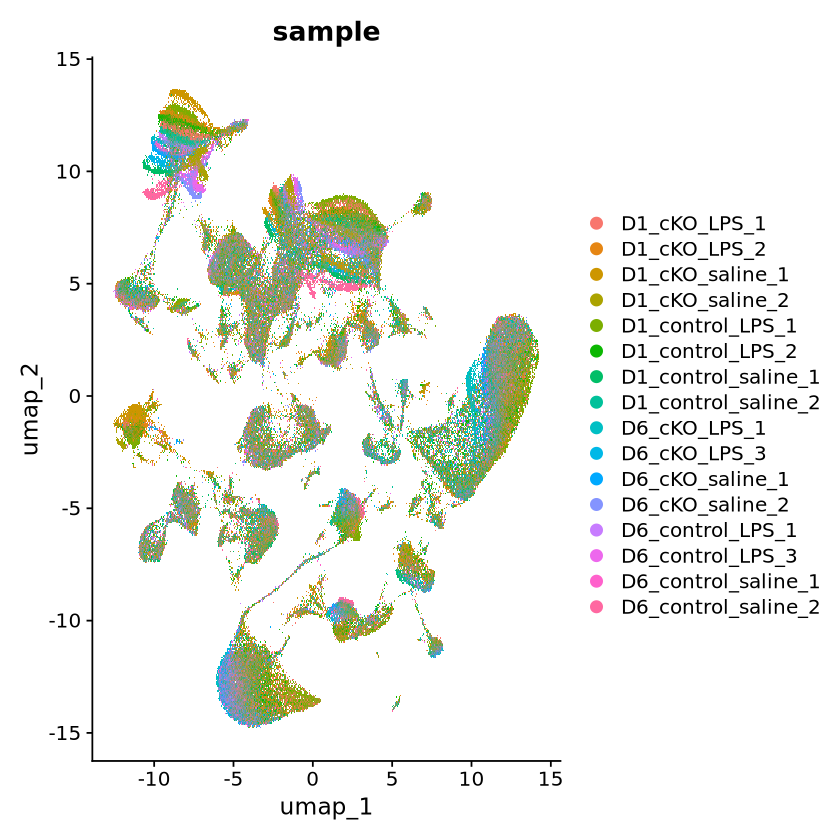

In [32]:
#visualize results without integration
DimPlot(big, reduction = "umap", group.by = c("sample"))

In [33]:
#expand memory to allow for large dataset integration
options(future.globals.maxSize = 1e+11)

In [34]:
# integrate datasets w/ default settings
big <- IntegrateLayers(object = big, method = RPCAIntegration, normalization.method = "SCT", verbose = T)

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 13815 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 8536 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 17254 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 12319 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 15635 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 13844 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 14372 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborh

In [35]:
big <- FindNeighbors(big, reduction = "integrated.dr", dims = 1:30)
big <- FindClusters(big, resolution = 2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 200370
Number of edges: 8269671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 92
Elapsed time: 95 seconds


2 singletons identified. 90 final clusters.



14:13:29 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:13:29 Read 200370 rows and found 30 numeric columns

14:13:29 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:13:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:14:00 Writing NN index file to temp file /tmp/RtmpFs5yij/filefa9682ebafa7c

14:14:00 Searching Annoy index using 1 thread, search_k = 3000

14:15:33 Annoy recall = 100%

14:15:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:15:42 Initializing from normalized Laplacian 

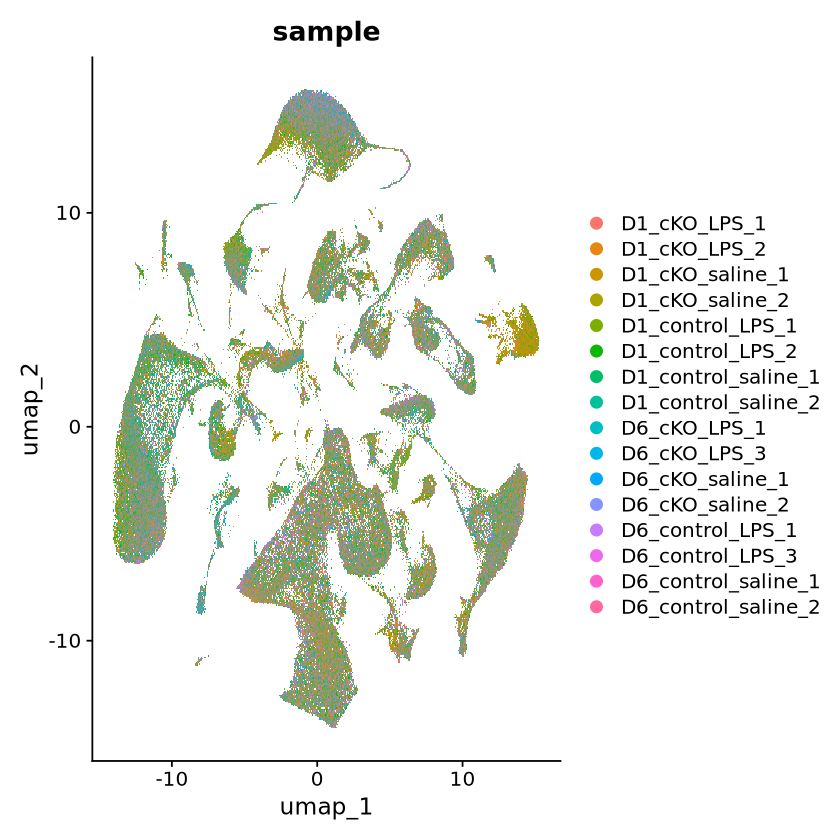

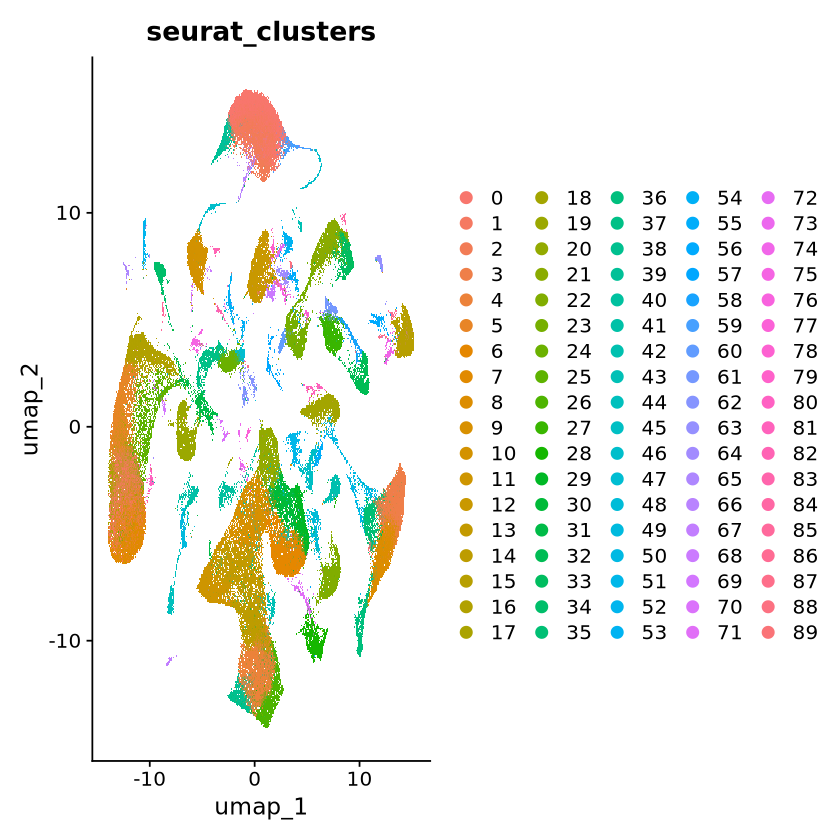

In [36]:
#visualize results after integration and clustering
big <- RunUMAP(big, dims = 1:30, reduction = "integrated.dr")
DimPlot(big, reduction = "umap", group.by = c("sample"))
DimPlot(big, reduction = "umap", group.by = c("seurat_clusters"))

In [37]:
big

An object of class Seurat 
57572 features across 200370 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

In [38]:
#re-join layers after integration - very important! 
big[["RNA"]] <- JoinLayers(big[["RNA"]])

In [39]:
saveRDS(big, "FAT7_SoupX_scT_Integrate_052624.rds")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



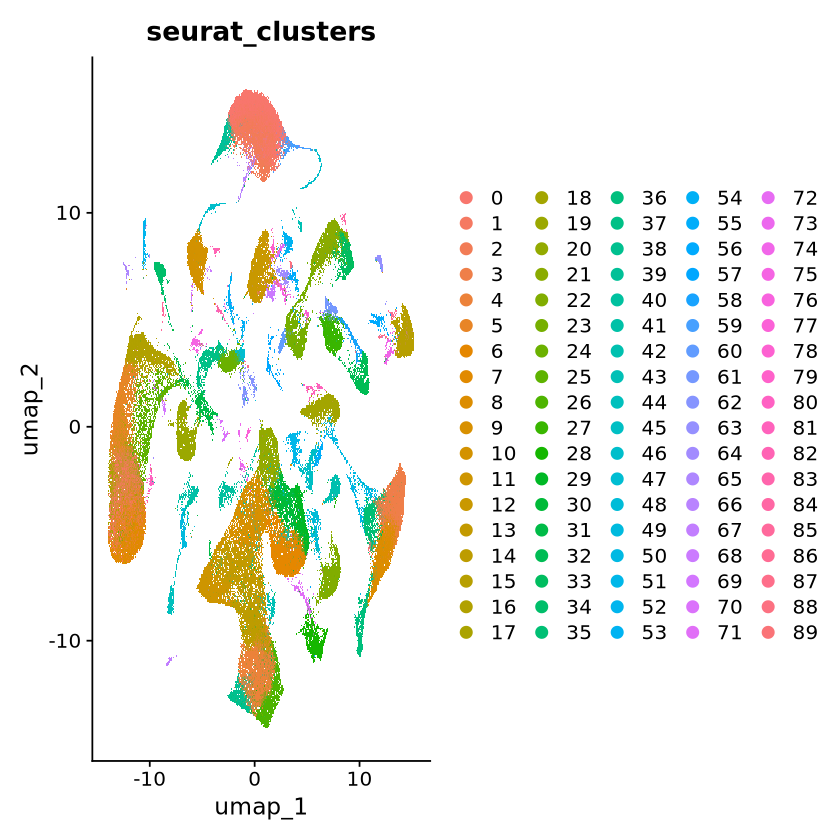

In [41]:
DimPlot(big, reduction = "umap", group.by = c("seurat_clusters"), label = FALSE)